<a href="https://colab.research.google.com/github/AkyLast/RepositorioEstudo-de-Redes-Neurais/blob/main/RedeNeural_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
import pandas as pd

In [2]:
df = pd.read_csv("admission_dataset.csv")

In [3]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,315,105,3,2.0,2.5,8.48,0,0.75
1,321,112,5,5.0,5.0,9.06,1,0.86
2,327,103,3,4.0,4.0,8.30,1,0.74
3,305,112,3,3.0,3.5,8.65,0,0.71
4,297,96,2,2.5,1.5,7.89,0,0.43


In [6]:
y = df["Chance of Admit "]
x = df.drop("Chance of Admit ", axis = 1)

x_train, x_test = x[0: 300], x[300:]
y_train, y_test = y[0: 300], y[300:]

In [7]:
x_train.shape

(300, 7)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
# Criando a arquitetura da rede neural:
modelo = Sequential()
modelo.add(Dense(units = 3, activation = "relu", input_dim = x_train.shape[1]))
modelo.add(Dense(units = 1, activation = "linear"))

# Treinando a rede neural:
modelo.compile(loss="mse", optimizer = "adam", metrics = ["mae"])
resultado = modelo.fit(x_train, y_train, epochs = 200, batch_size = 32, validation_data = (x_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 52870.1719 - mae: 229.6909 - val_loss: 50235.1055 - val_mae: 223.9533
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48721.0898 - mae: 220.4859 - val_loss: 45988.9492 - val_mae: 214.2797
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44588.2656 - mae: 210.9297 - val_loss: 42080.8594 - val_mae: 204.9733
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 40626.6758 - mae: 201.3699 - val_loss: 38499.6797 - val_mae: 196.0578
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37248.2109 - mae: 192.8074 - val_loss: 35224.7148 - val_mae: 187.5340
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34021.4492 - mae: 184.2620 - val_loss: 32240.3770 - val_mae: 179.4143
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31020.9199 - mae: 175.9437 - val_loss: 29513.0117 - val_mae: 171.6581
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 28621.8711 - mae: 169.0026 - val_loss

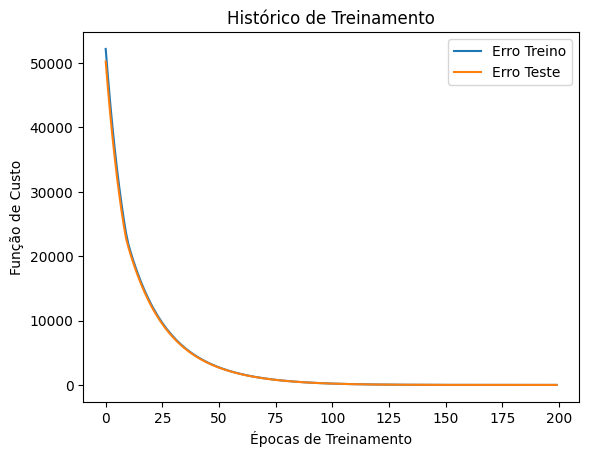

In [10]:
import matplotlib.pyplot as plt

plt.plot(resultado.history["loss"])
plt.plot(resultado.history["val_loss"])
plt.title("Histórico de Treinamento")
plt.ylabel("Função de Custo")
plt.xlabel("Épocas de Treinamento")
plt.legend(["Erro Treino", "Erro Teste"])
plt.show()